<Axes: >

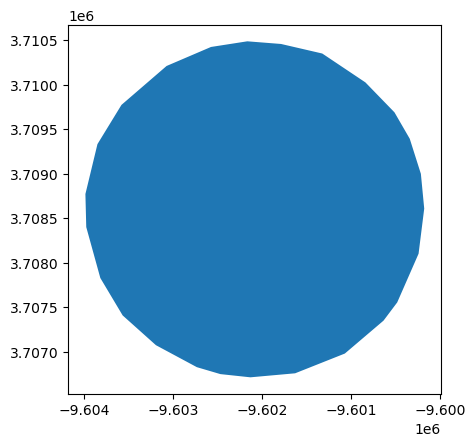

In [34]:
import numpy as np
import pandas as pd
import geopandas as gpd

AL_places = gpd.read_file(r"C:\Users\no\Documents\School\2025-2026 school\Spring 2026\AES 408 - Python for GIS\Repository\hw2\AL_places\cb_2024_01_place_500k.shp")
#AL_places = gpd.read_file(r"C:\Users\cquering\Documents\Repository\408\hw2\AL_places\cb_2024_01_place_500k.shp")
AL_places_sorted = AL_places.sort_values(by=["NAME"]) #creating alphabetized version
AL_places_sorted_meter = AL_places_sorted.to_crs(epsg=3857) #reprojecting to WGS 1984
AL_places_bounds = pd.concat([AL_places_sorted_meter, AL_places_sorted_meter.bounds], axis=1) #adding bounds as columns on dataframe

geometry = AL_places_bounds['geometry']
minX = AL_places_bounds['minx']
maxX = AL_places_bounds['maxx']
minY = AL_places_bounds['miny']
maxY = AL_places_bounds['maxy']
name = AL_places_bounds['NAME']

AL_places_bounds.head() #exploring shapefile! 
AL_places_bounds.iloc[[59]].plot()

In [ ]:
for index, row in AL_places_bounds.iterrows():
    if index == 479: #evil hard-coding to remove Sanford from list of circular towns. I understand that this is not ideal.
        continue 
    diameterX =  maxX.iloc[index]-minX.iloc[index]
    diameterY = maxY.iloc[index]-minY.iloc[index]
    Diameter_difference = np.absolute(diameterX - diameterY)
    Diameter_average = (diameterX + diameterY)/2
    circularArea = ((Diameter_average/2)**2)*np.pi
    realArea = geometry.iloc[index].area
    areaDifference = np.absolute(circularArea - realArea)
    percentAreaDif = areaDifference/realArea * 100
    if diameterX > diameterY:
        if Diameter_difference <= (0.05*diameterY):
            if percentAreaDif <= 3:
                print(name.iloc[index],"AL is a circular town! Found at index", index)
    elif diameterX < diameterY:
        if Diameter_difference <= (0.05*diameterX):
            if percentAreaDif <= 3:
                print(name.iloc[index],"AL is a circular town! Found at index", index)

Brantley AL is a circular town! Found at index 59
Goldville AL is a circular town! Found at index 214
Coffee Springs AL is a circular town! Found at index 107
Oakman AL is a circular town! Found at index 400


In [ ]:
# by making either of my criteria more strict (similarity of diameters or 
# difference between theoretical circular area and actual area) results in me losing Coffee Springs
# from my list of circular towns before Sanford is removed
# presumably if my method was less dependent on the exact rotational position of each town, this problem
# with Sanford would not be encountered